# 2491 - Data Visualization - Prof. Iolanda Velho
Giorgio Chachanidze (44944) | Thomas Dornigg (41727)

In [1]:
# @hidden
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.style as style
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter
from functools import reduce
from itertools import cycle, islice
%matplotlib inline
from IPython.display import Image
from IPython.core.display import display, HTML

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", module = "matplotlib\..*" )
warnings.filterwarnings("ignore",category=plt.cbook.mplDeprecation)

In [26]:
# @hidden
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('.cm-comment:contains(@hidden)').closest('div.input').hide();
 }else {
 $('.cm-comment:contains(@hidden)').closest('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
The raw code for this notebook is by default hidden for easier reading.
To display the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Data Visualization (course project): U.S. Police Shootings

<p align="center">
    <img width="900" height="350" src = "https://miro.medium.com/max/1936/0*uQOgFqi7gZkaSkX9">
 </p>

The controversial killing of **George Floyd** - a 46-year old black man - in Minneapolis last year, caused huge international protests against police brutality and racism. The police officers associated were found guilty of second-degree murder and are all held in custody at the moment. In the wake of the protests, many people in the US and around the globe started to sympathize with the **Black Lives Matter movement**, founded in 2013. Further, these protests precipitated a worldwide debate on racial injustice that has led to numerous legislative proposals on federal, state, and municipal levels intended to combat police misconduct, systemic racism, qualified immunity and police brutality. 

However, since the start of the protests, **police violence has not stopped**. In fact, the US has one of the highest number of police shootings in the entire world. The more important question arising from not only this particular case but also from other fatal incidents involving minority groups in the US is: was such a brutal act towards a citizen **necessary and justified** or was it out of other reasons such as **hate and racism**?

The main goal of this course-project is to make use of data visualization techniques to analyze police shootings in the US during a time period between January 2015 and June 2020. We will be addressing our **main hypothesis** below, which originates from the huge backlash and accusations towards US police regarding hate and racism.

<code>**Police officers in the US shoot offenders more frequently due to their racial background, indicating racism issues within police forces.**</code>

With the help our dataset, we want to conclude if race specifically can be a prominent determinant of the actual behaviours of police officers. We will answer the following **research questions**, which will help us our main hypothesis:

**Q1**: Is the general perception of media coverage correct that black people are victims of police shootings more frequently than other racial groups, such as Whites, Hispanics or Asians?

**Q2**: Are there specific geographical areas like states or cities in the US, where police shootings happen more often? If so, which racial group is most affected?

**Q3**: Are there differences in age among the ethnicity groups? If so, which age group is involved more in police shootings?

**Q4**: Is there any evidence that minority groups are more threatening towards police officers, which may lead them to shoot the offender?

**Q5**: Does the usage of body cameras discourage police shootings of minority group members?

The dataset **"US Police Shootings"** for this project can be found on <a href="https://www.kaggle.com/ahsen1330/us-police-shootings">Kaggle</a>. It contains basic data about 4,895 individuals that were killed by US police officers between January 2015 and June 2020. Along with it, there are more specific information provided about every particular incident. A full list of variables can be found below:

- **id**: unique identifier per case
- **name**: name of shot person
- **date**: date of incident
- **manner_of_death**: how was the person killed?
- **armed**: Was the person killed armed? If so, what was the weapon?
- **age**: in years
- **gender**: male or female
- **race**: White, Black, Asian, Hispanic, Native, Other
- **city**: 2288 different cities in the US
- **state**: 50 different states in the US
- **signs_of_mental_illness**: Were there apparent signs that a person was mentally ill (True/False)?
- **threat_level**: Were police officers attacked by the suspects?
- **flee**: Was there an attempt fleeing? If so, by what means?
- **body_camera**: Was a body camera in use during the shooting?
- **arms_category**: What is the category of the weapon used by the suspect, if any.

Also, the group decided to add two more features to the dataset, namely:
- year
- month

## Contents

1. Loading and describing the dataset
2. Data Visualizations
3. Limitations of our research
4. Main Takeaways
5. Conclusion
6. References

## 1. Loading and describing the dataset

The dataset for this project was downloaded from Kaggle and uploaded to a Github account which allows for a more flexible data import. 

In [13]:
# @hidden
url = 'https://raw.githubusercontent.com/ThomasD96/University_Repo/master/Nova_SBE/Data_Visualization/03_course_project/shootings.csv'
df = pd.read_csv(url, low_memory = True)
df['date'] =  pd.to_datetime(df['date'])

# create year variable
df['year'] = df['date'].astype(str).str[:4].astype(int)
# create month variable
df['month'] = df['date'].astype(str).str[5:7].astype(int)

In [4]:
# @hidden
display(HTML(df.head(5).to_html()))

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015,1


Before doing the analysis via visualizations, we checked for missing values. Fortunately, we don't have to do any transformations or imputation of the data since no missing values nor duplicates were detected. Thus, we were able to move directly to the feature engineering and visualization part.

In [5]:
# @hidden

# checking for missing values
df.isna().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                      False
age                        False
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
arms_category              False
year                       False
month                      False
dtype: bool

In [6]:
# @hidden

# checking for duplicates
df.duplicated().value_counts() 

False    4895
dtype: int64

## 2. Data Visualizations

In this section, we will use different visualizations in order to come to a conclusion regarding our main hypothesis: <code>Police officers in the US shoot offenders more frequently due to their racial background, indicating racism issues within police forces.<code>

### 2.1. Police Shootings over time in the U.S. 

To begin with, we will focus on police killings over time split by race to get an idea if the numbers are changing over time and whether there are differences in the absolute level of shootings among racial groups. The lineplot will yield insights regarding the first research question: *Is the general perception of media coverage correct that black people are victims of police shootings more frequently than other racial groups, such as Whites, Hispanics or Asians?*

<Figure size 936x432 with 0 Axes>

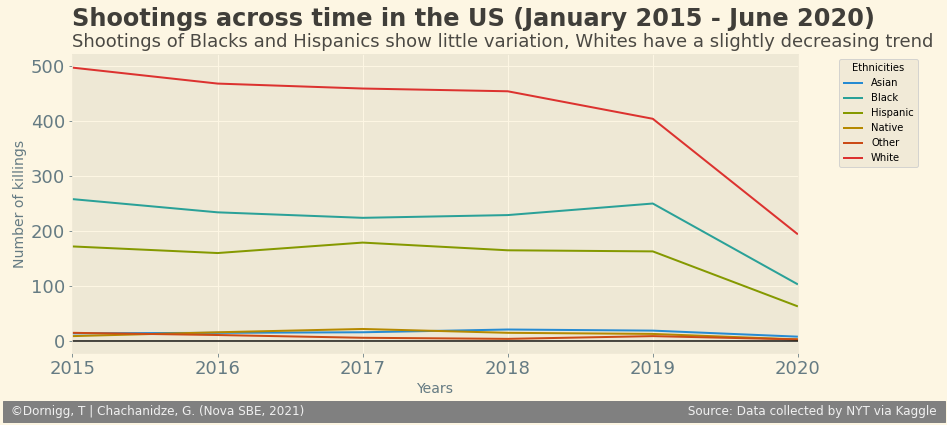

In [5]:
# @hidden
style.use('Solarize_Light2')
plt.figure(figsize=(13, 6))
df_race_time = df[['year', 'race']]
df_race_time = df_race_time.groupby(['race', 'year']).size().reset_index()
df_race_time.columns = ['race', 'Year', 'amount']
trial = df_race_time.groupby(['Year', 'race'])['amount'].sum().reset_index()
trial = trial.pivot(index="Year", columns="race").dropna(axis = 1, how="any").reset_index()
fte_graph = trial.plot(x = 'Year', y = 'amount', figsize=(13,5.5))
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)

# Customizing the tick labels of the y-axis
fte_graph.set_xticklabels(labels = [2015,  2016, 2017, 2018, 2019, 2020]);

# Generate a bolded horizontal line at y = 0
fte_graph.axhline(y = 0, color = 'black', linewidth = 2, alpha = .7)

fte_graph.set_xlim(left = 2015, right = 2020)

#Remove the label of the x-axis
fte_graph.xaxis.label.set_visible(True)
fte_graph.yaxis.label.set_visible(True)

plt.xlabel("Years", fontsize = 14)
plt.ylabel("Number of killings", fontsize = 14)

fte_graph.legend(title='Ethnicities', bbox_to_anchor=(1.05, 1), loc='upper left')

# The signature bar
fte_graph.text(x = 2014.55, y = -134, s = ' ©Dornigg, T | Chachanidze, G. (Nova SBE, 2021)                                                                                                   Source: Data collected by NYT via Kaggle ',
fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey');

#Title and Subtitle Placement
fte_graph.text(x = 2015, y = 573, s = "Shootings across time in the US (January 2015 - June 2020)",
               fontsize = 24, weight = 'bold', alpha = .75);
fte_graph.text(x = 2015, y = 535,
               s = 'Shootings of Blacks and Hispanics show little variation, Whites have a slightly decreasing trend',
              fontsize = 18, alpha = .70);
plt.show();

**Main Observation**:

We can see that **Whites rank highest, followed by Blacks and then Hispanics**. Shootings of individuals belonging to Asian, Native (American) and all other racial groups seem to be very low over time. The general trend for each of the racial groups other than White is fairly constant with little variation over time. For Whites we can see a slightly decreasing trend line up to 2020. However, what matters most here is the ranking among the groups.

The big dip in shooting for the top 3 racial groups in 2020 can be explained due to the fact that the data for this year only includes incidents until June. Thus, this **decrease is insignifcant in terms of an actual change in the number of shootings in 2020**. However, we can observe the level in 2020 so far, which is at approximately 50% of the previous year's number, respectively. This could imply that at the end of 2020, a similar number for each racial group can be observed, implying no change over time.

As a further note: the ranking most likely occurs because there are **far more individuals belonging to White** compared to Black, Hispanic, etc. This could explain the findings here. According to a census by the US government [1] the racial distribution in the US is as follows:

- White: 60.1%
- Hispanic: 18.5%
- Black: 13.4%
- Asian: 5.9%
- Native: 1.3%
- Other: 0.8%

This confirms the assumption that Whites may be the racial group killed most just because there are more individuals belonging to the ethnicity in absolute terms. Thus, **individuals from the Black group are not killed more often than individuals from other racial groups**.

In summary, the first research question *whether the general perception of media coverage is correct that black people are victims of police shootings more frequently than other racial groups, such as *Whites, Hispanics or Asians?* **can be refuted**. The reason behind this thinking may be selective perception or media coverage.

For the following analysis we will limit ourselves on the three racial groups: Whites, Hispanics and Blacks as they represent more than 90% of the US population.

### 2.2. Geographical distribution of police shootings across the U.S. states

In order to answer the second research question - *Are there specific geographical areas like states or cities in the US, where police shootings happen more often? If so, which racial group is most affected?* - we looked at first at the national state level to figure out, which states have the highest amount of shootings.

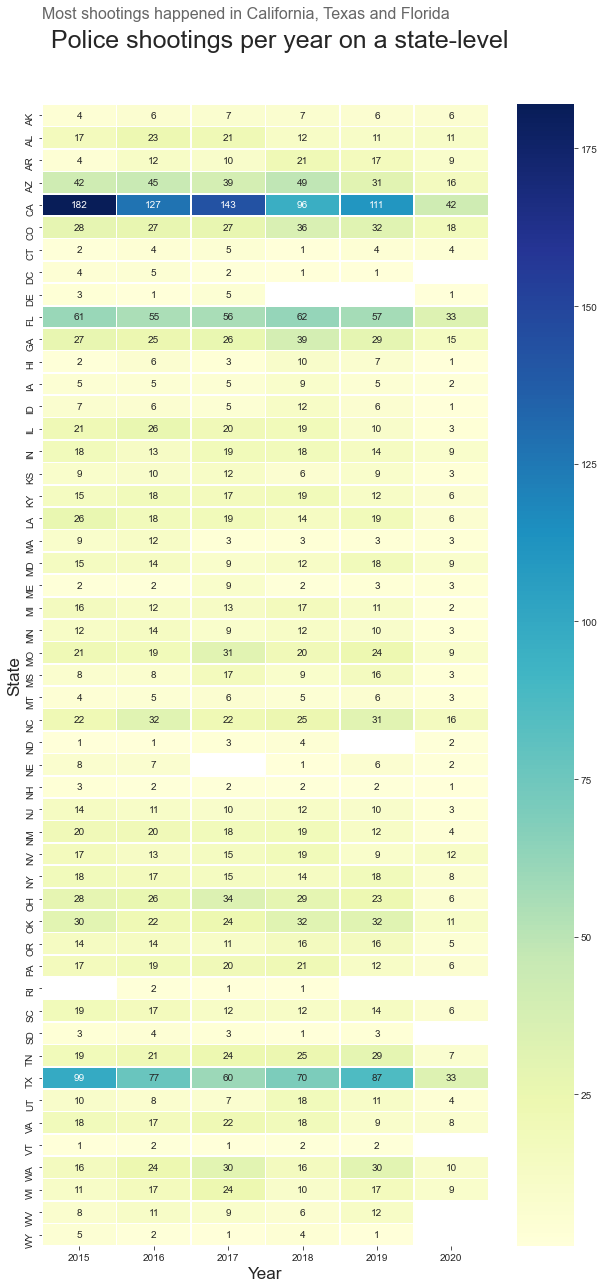

In [8]:
# @hidden
sns.set_style("ticks")
sns.set_palette("RdBu")
df_year_state = df.groupby(['year','state']).apply(lambda x: x['manner_of_death'].count()).reset_index(name='Counts')
df_pivot = pd.pivot(df_year_state, columns='year', index='state', values='Counts')
df_pivot.replace(np.NaN, 0)
plt.figure(figsize=(10, 21))
fig = sns.heatmap(df_pivot, cmap='YlGnBu', annot=True, fmt=".0f", cbar=True, linewidths=.7)
plt.xlabel('Year', size=17)
plt.ylabel('State', size=17)
plt.title('Most shootings happened in California, Texas and Florida',fontsize=16, loc = 'left', alpha = 0.70, y=1.07)
plt.suptitle('Police shootings per year on a state-level',fontsize=25, y=0.93, x=0.4555)
plt.show();

**Main Observation**:

In the heatmap above we can clearly see huge differences of police shootings on a state-level. The three that states clearly stand out are **Califorina, Texas and Florida** for every respective year. These findings can be explained with the distribution of US citizens, which is more dense on the West- and Eastcoast as well as in the South, while the remaining states are less densely populated. As a consequence, our second research question is **only true in absolute terms** but when comparing those numbers to the population in each state, they make sense.

### 2.3. Shooting incidents by racial groups on a city-level

The second part of our previous research question will be answered by analyzing police shootings on a city level in the three states identified above (California, Texas and Florida). As already mentioned, we only show relative numbers of the three racial groups of our interest (White, Hispanic and Black).

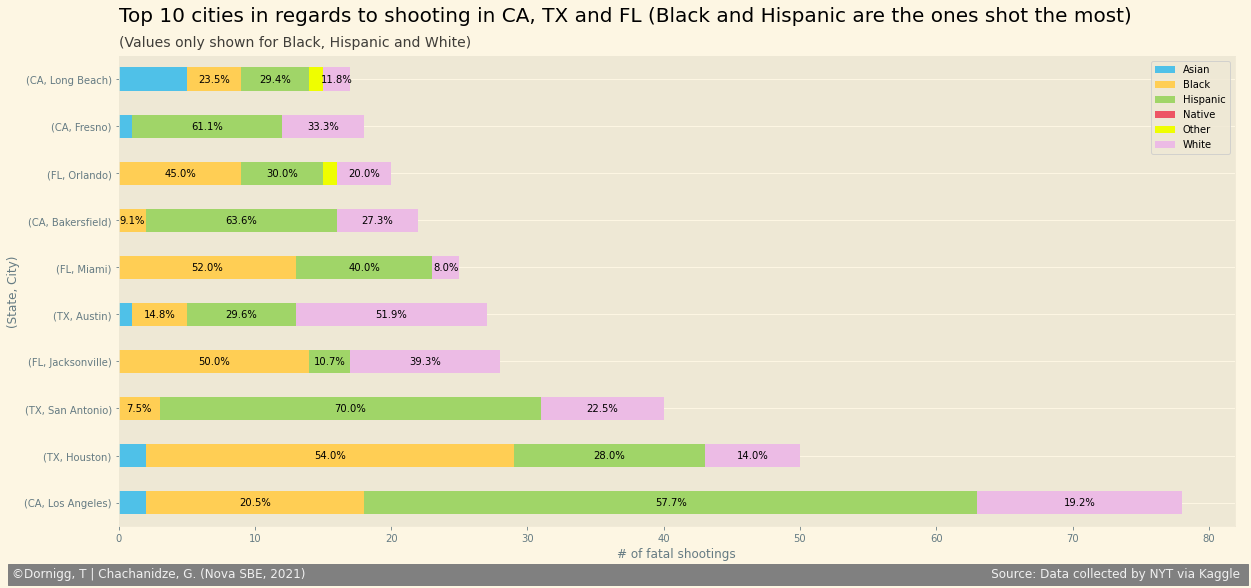

In [30]:
# @hidden
plt.style.use('Solarize_Light2')
filter_list = ['TX', 'CA', 'FL']
df = df[df.state.isin(filter_list)]
df_states = pd.pivot_table(df, values='id', index=['state','city'], columns=['race'], aggfunc='count')
df_states['Total'] = df_states.sum(skipna=None, axis = 1)
df_states = df_states.sort_values(by='Total', ascending =False).head(10)

#Graph1 - city
fig, ax = plt.subplots(figsize=(20, 14*0.6180))
data = df_states.drop(['Total'], axis=1)

my_colors = list(islice(cycle(["#4FC1E8", "#FFCE54", "#A0D568", "#ED5564", "#EFFE00", '#ECBBE5']), None, len(data)))
g = data.plot(kind="barh",stacked=True, ax = ax, color=my_colors) 

g.xaxis.grid(True)
g.yaxis.grid(False)
plt.ylabel("(State, City)");
plt.xlabel("# of fatal shootings");


#plt.suptitle("In the 10 cities with most shootings, Black and Hispanic are the ones shot the most", fontsize=16, weight='bold');
#plt.text(x=20, y=10, s='Values only shown for Black, Hispanic and White', fontsize=14, alpha=0.75)

plt.title('Top 10 cities in regards to shooting in CA, TX and FL (Black and Hispanic are the ones shot the most)',fontsize=20, loc = 'left', alpha = 1, y=1.06)
plt.text(x=0, y=9.7, s='(Values only shown for Black, Hispanic and White)', fontsize=14, alpha=0.75)

df_rel = data.div(df_states['Total'], 0)*100
df_rel = df_rel.fillna(0).astype("float")

for n in df_rel[['Black','Hispanic','White']]: 
    for i, (cs, ab, pc) in enumerate(zip(data.loc[:, :].cumsum(1)[n], data[n], df_rel[n])):
        if math.isnan(cs-ab/2):
            pass
        else:
            plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', va = 'center', ha = 'center', fontsize = 10)
            
ax.xaxis.grid(False)
ax.yaxis.grid(True)
ax.text(x = -7.8, y = -1.6, s = '©Dornigg, T | Chachanidze, G. (Nova SBE, 2021)                                                                                                                                                                                 Source: Data collected by NYT via Kaggle ',fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey');
plt.legend(bbox_to_anchor=(1, 1))
plt.show();

**Main Observation**:

The top 10 cities with the most police shootings in **California, Texas and Florida** can be seen above. For the top 3, Los Angeles, Houston and San Antonio (among others), we find that **individuals that are Hispanic or Black are killed more often than White suspects**. Depending on the city, either Hispanics or Blacks account for the largest share by far compared to other groups, especially Whites. For instance, in Los Angeles, 57.7% of the police shootings were Hispanic, which is more than victims of Whites and Blacks together! This leads us to conclude that even though White individuals dominate demographics, **more individuals from the minority groups Black and Hispanic are shot by the police.**

### 2.4. Age by offenders across racial groups

Another aspect that may contribute to our work is age. General statistics indicate that young offenders between 18-25 years happen to be involved much more in police shootings. A violin plot will show which ages of each racial group are being shot by police officers most. The following research question is answered using this plot: *Are there differences in age among the ethnicity groups? If so, which age group is invovled more in police shootings?*

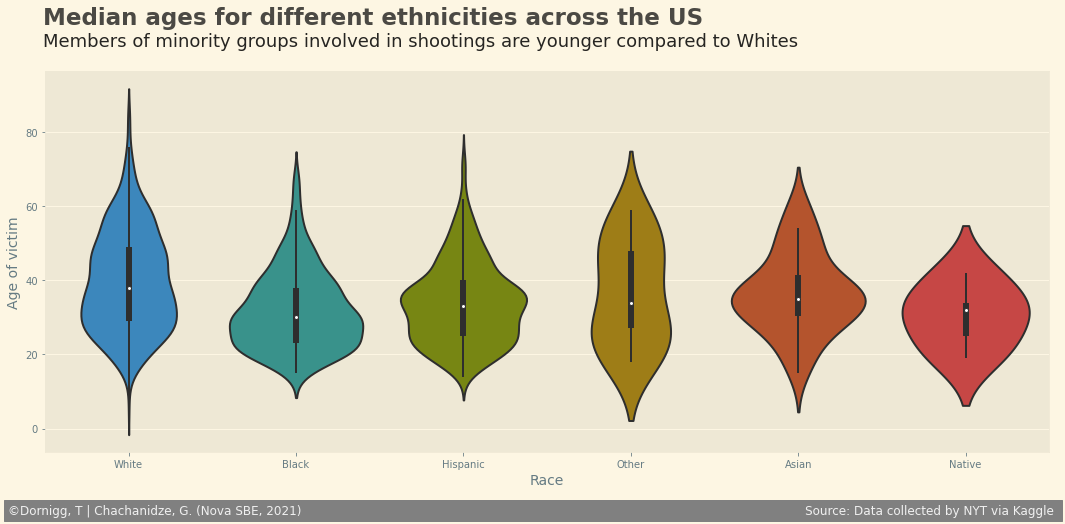

In [34]:
# @hidden
plt.style.use('Solarize_Light2')
plt.figure(figsize=(18, 7))
fte_graph = sns.violinplot(x='race', y='age', data=df)

#Remove the label of the x-axis
fte_graph.xaxis.label.set_visible(True)
fte_graph.yaxis.label.set_visible(True)

plt.xlabel("Race", fontsize = 14)
plt.ylabel("Age of victim", fontsize = 14)

# The signature bar
fte_graph.text(x = -0.72, y = -23, s = '©️Dornigg, T | Chachanidze, G. (Nova SBE, 2021)                                                                                                                                  Source: Data collected by NYT via Kaggle ',fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey');

##Title and Subtitle Placement
fte_graph.text(x = -0.51, y = 109, s = "Median ages for different ethnicities across the US", fontsize = 23, weight = 'bold', alpha = .7);
fte_graph.text(x = -0.51, y = 103, s = 'Members of minority groups involved in shootings are younger compared to Whites', fontsize = 18, alpha = .85)
plt.show();

**Main Observation**:

From the violinplot above we can see that the **median for White offenders is highest close to 40 years**. On the other hand, minority groups such as **Blacks, Hispanics and Native Americans have the lowest median**, indicating that offenders from these groups are younger when involved in a police shooting. To emphasize even more, the minority groups mentioned are thicker on their lower end of their violin, which means that there more incidents involving young members of this group than old members. The most common age for Blacks points towards 20 to 25 years, while for other minorities like Hispanics and Natives it is around 30 years. For Whites it is even higher around 35 years. The shape seems to be similar for Blacks, Hispanics and Natives, while for Whites the violin seems to be more stretched. The range for White offenders is also much higher covering all age groups, supporting our findings.

Finally, we find **differences in age among the ethnicities with lower median values for minority groups** as well as with more cases involving individuals between 20 and 30 years.

### 2.5. Threat level exerted by offenders according to race

The threat level exerted by offenders could explain why more members of a specific ethnicity are shot down. Police officers need to protect the general public and themselves at all times, which requires them to shoot offenders that may pose a threat. The following pair grid answers the question whether *there is any evidence that minority groups are more threatening towards police officers, which may lead them to shoot the offender?*. The data used will be based on the top 10 cities with the most shootings identified before. The group "Other" doesn't have sufficient datapoints, which is why it is not shown in the graph.

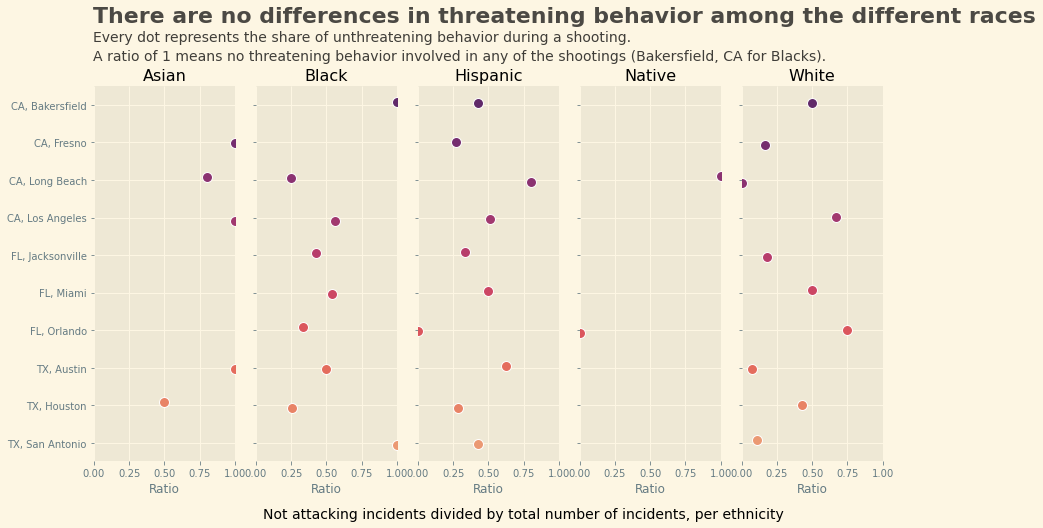

In [24]:
# @hidden
plt.style.use('Solarize_Light2')
data = pd.pivot_table(df, values='id',index=['state','city','race'],
                                     columns=['threat_level'], aggfunc='count').reset_index(level='race').fillna(0)
data = data.loc[df_states.index.tolist()].reset_index()
data['ratio'] = (data['other'] + data['undetermined'])/data.sum(axis=1)
data = data.drop(['other', 'undetermined','attack'], axis = 1)
data = data.set_index(['race', 'state','city']).unstack(['race']).reset_index()
data.columns = ['_'.join(col) for col in data.columns]
data['state, city'] = data[['state_', 'city_']].agg(', '.join, axis=1)
data.drop(["state_","city_"], axis=1, inplace=True)

g = sns.PairGrid(data,
                 x_vars=data.columns[:-1], y_vars=["state, city"],
                 height=6, aspect=.40)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", linewidth=1, edgecolor="w", palette="flare_r")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 1), xlabel="Ratio", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Asian", "Black", "Hispanic",
          "Native", "White", "Other"]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    

plt.text(x=-4.60, y=-2.2, s='There are no differences in threatening behavior among the different races', fontsize=22, weight='bold', alpha = 0.7)
plt.text(x=-4.60, y=-1.7, s='Every dot represents the share of unthreatening behavior during a shooting.', fontsize=14, alpha=0.75)
plt.text(x=-4.60, y=-1.2, s="A ratio of 1 means no threatening behavior involved in any of the shootings (Bakersfield, CA for Blacks).", fontsize=14, alpha=0.75)
plt.text(x=-3.4, y=11, s='Not attacking incidents divided by total number of incidents, per ethnicity', fontsize=14)
sns.despine(left=True, bottom=True)

**Main Observation**:

The assumption that minority groups behave more threatening or aggressively, which may explain why they are shot more frequently **is rejected**. Whites, Blacks and Hispanics show very threatening behavior in some cities, while in others they don't. Overall, **no group can be identified to stand out here**, which suggests that the threat level doesn't show any differences among the groups.

### 2.6. Body cam usage by officers across different races

Finally, we look at the usage of body cameras worn by police officers during shootings. A horizontal barplot showing the relative number of cases in which a body camera was used and not per racial group will help us answer our last research question: *Does the usage of body cameras discourage police shootings of minority group members?* We identify this variable as crucial to our overall hypothesis as police officers that indeed have resentments against minority groups would avoid having video material that may potentially be used against them in a courtroom proofing wrong behavior.

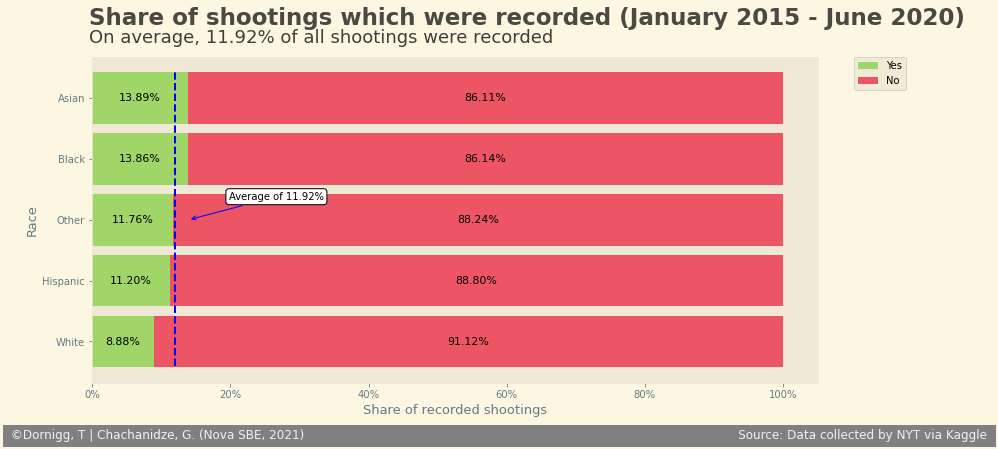

In [36]:
# @hidden
plt.style.use('Solarize_Light2')
b = df.groupby(['body_camera', 'race']).size().reset_index()
b.columns = ['body_camera', 'race', 'amount']

asian = b[b['race'] == 'Asian']['amount'].to_list()
black = b[b['race'] == 'Black']['amount'].to_list()
white = b[b['race'] == 'White']['amount'].to_list()
hispanics = b[b['race'] == 'Hispanic']['amount'].to_list()
other = b[b['race'] == 'Other']['amount'].to_list()

asian_norm = [i/sum(b[b['race'] == 'Asian']['amount'].to_list()) for i in asian]
black_norm = [i/sum(b[b['race'] == 'Black']['amount'].to_list()) for i in black]
white_norm = [i/sum(b[b['race'] == 'White']['amount'].to_list()) for i in white]
hispanics_norm = [i/sum(b[b['race'] == 'Hispanic']['amount'].to_list()) for i in hispanics]
other_norm = [i/sum(b[b['race'] == 'Other']['amount'].to_list()) for i in other]

race_list = ['Asian', 'Black', 'White', 'Hispanic', 'Other']
data_combined = pd.DataFrame(list(zip(asian_norm, black_norm, white_norm, hispanics_norm, other_norm))).T
data_combined.columns = ['No', 'Yes']
data_combined = data_combined[['Yes', 'No']]
data_combined['Race'] = race_list
data_combined = data_combined.set_index('Race')
data_combined = data_combined.sort_values('Yes')
data_combined = data_combined * 100
average = data_combined['Yes'].mean()

#plt.style.use('Solarize_Light2')

ax = data_combined.plot.barh(stacked=True, figsize=(13, 5.99), color={"Yes": "#A0D568", "No": "#ED5564"}, bottom=None, width=0.85)

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located    
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{width:.2f}%'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=11)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.text(x = -12.3, y = -1.6, s = ' ©Dornigg, T | Chachanidze, G. (Nova SBE, 2021)                                                                                                                Source: Data collected by NYT via Kaggle ',fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey');
##Title and Subtitle Placement
ax.text(x = -0.53, y = 5.2, s = "Share of shootings which were recorded (January 2015 - June 2020)", fontsize = 23, weight = 'bold', alpha = .70);
ax.text(x = -0.53, y = 4.9, s = 'On average, 11.92% of all shootings were recorded', fontsize = 18, alpha = .75)

# only one line may be specified; ymin & ymax spedified as a percentage of y-range
plt.axvline(x=average, ymin=0.051, ymax=0.9547069, color='blue', ls='--', lw=2)

annot = ax.annotate("Average of " + str(round(average, 2)) + "%", xy=(14,2), xytext=(40,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->", color = 'blue'))
annot.set_visible(True)


# add labels
ax.set_ylabel("Race", fontsize=13)
ax.set_xlabel("Share of recorded shootings", fontsize=13)
plt.gca().set_xticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_xticks()])
plt.grid(False)
plt.show();

**Main Observation**:

We find that only a **small share of police shootings are recorded by body cameras**. Shootings of minority group members are more likely to be captured on camera compared to White individuals, which are well below average (around 11.92%). This may indicate that **police officers do not shoot a suspect due to resentment and hate** (against a minority group) but out of other reasons. However, as only a small fraction of overall shootings are taped by body cameras, there is a lot of room for misbehavior, which can't be proved with video material. A higher usage of body cameras may incentivize police officers to avoid misbehavior in all contexts.

## 3. Limitations

Every analysis brings is limitations along, which will be elaborated on in this section. First, the focus of this research is very limited. Racism may be rooted in many factors, which may be out of scope of the dataset in use. We suggest extending the dataset and collecting more information for future research.

Next, as population sizes of the different racial groups aren't included in the dataset, we can only cite external sources that show us the split among them. However, calculations that are relative rather than absolute may yield further insights. Inclusion of census data by the US government could help future research overcome this limitation.

Finally, using data visualization techniques, we can't make any statement regarding the significance of the variables used for supporting or rejecting our main hypothesis. Further research should elaborate on an effective method to test whether any of the variables in the dataset make a difference in determining the validity of the main hypothesis.

## 4. Main Takeaways

- White People are mostly affected in police shootings followed by Black and Hispanic people in terms of absolute numbers. Asians and Native Americans are groups that are least impacted by shooting through police forces. These findings make sense comparing them US demographics according to racial groups.

- There are big differences between the number of police shootings across US states. California, Texas and Florida have substantially more shootings than other states. This is in accordance to their respective population density.

- Los Angeles, Houston and San Antonio are the cities with the most shootings in California, Texas and Florida. It seems that in those cities, minorities account for a larger share of police shootings than Whites.

- The median age of offenders shot by the police is highest for Whites and lowest for minorities such as Blacks. This means that younger members of minorities are involved in police shootings. Also, the number of cases is bigger for young offenders of minorities compared to White offenders.

- The threat level exerted by offenders doesn't offer differences among the races. 

- Only a little share of police shootings is recorded by body cameras. Shootings of White offenders is lowest, while of Blacks it is highest.

## 5. Conclusion

The data visualizations created based on our dataset above offer insights about police shootings of almost 5,000 individuals in the US between January 2015 and June 2020. The main conclusion drawn is that even if there are relatively more shootings belonging to Blacks and Hispanics in the cities with the highest number of incidents, no reasons can be identified that may lead to this fact. Young minority members are more prone to be involved in a police shooting, which is not rooted in whether they are threatening or not. Body camera usage supports the fact that police officers do not discriminate towards minority groups. Overall, we can conclude that **US police forces are doing their job of protecting the general public, without any racist motives**.

However, as already mentioned, the usage of body cameras is relatively low (around 10%), offering opportunities for police leaders to protect officers and citizens from misbehavior on both sides. Increasing the share of body cameras in place may diminish injustice.

## 6. References

[1] https://www.census.gov/quickfacts/fact/table/US/PST045219